In [2]:
from ekpy import analysis
import numpy as np
import scipy.integrate as it
from scipy.signal import find_peaks, savgol_filter, peak_widths
import matplotlib.pyplot as plt
from ekpy.analysis.analysisgeotemp import use_analysis_file #note need to make this under __all__

In [3]:
# load the dataset
Data_folder_path = "C:/Users/geofr/Desktop/Research/Data/FE/PV/"

dset = analysis.load_Dataset(Data_folder_path + r'BTO')

# print dset, parsable collection of meta data which holds pointers to the real data files
dset

,initial_delay,pulse_delay,freq,voltage,capacitor_area,thickness,permittivity,amplification,format,type,points,count,x_increment,x_origin,x_reference,y_increment,y_origin,y_reference,trial,filename
0,0.00005,0.000005,10,2.0,4.000000e-08,1.000000e-08,30,8,0,0,995,1,4.720000e-07,2.710505e-20,0,0.020101,0.0,0,0,fe_pv__0.csv
1,0.00005,0.000005,10,2.0,4.000000e-08,1.000000e-08,30,8,0,0,995,1,4.720000e-07,2.710505e-20,0,0.020101,0.0,0,0,fe_pv__1.csv
2,0.00005,0.000005,10,2.0,4.000000e-08,1.000000e-08,30,8,0,0,995,1,4.720000e-07,2.710505e-20,0,0.020101,0.0,0,0,fe_pv__2.csv
3,0.00005,0.000005,10,2.0,4.000000e-08,1.000000e-08,30,8,0,0,995,1,4.720000e-07,2.710505e-20,0,0.020101,0.0,0,0,fe_pv__3.csv
4,0.00005,0.000005,10,2.0,4.000000e-08,1.000000e-08,30,8,0,0,995,1,4.720000e-07,2.710505e-20,0,0.020101,0.0,0,0,fe_pv__4.csv
5,0.00005,0.000005,10,2.0,4.000000e-08,1.000000e-08,30,8,0,0,995,1,4.720000e-07,2.710505e-20,0,0.020101,0.0,0,0,fe_pv__5.csv
6,0.00005,0.000005,10,2.0,4.000000e-08,1.000000e-08,30,8,0,0,995,1,4.720000e-07,2.710505e-20,0,0.020101,0.0,0,0,fe_pv__6.csv
7,0.00005,0.000005,10,2.0,4.000000e-08,1.000000e-08,30,8,0,0,995,1,4.720000e-07,2.710505e-20,0,0.020101,0.0,0,0,fe_pv__7.csv
8,0.00005,0.000005,10,2.0,4.000000e-08,1.000000e-08,30,8,0,0,995,1,4.720000e-07,2.710505e-20,0,0.020101,0.0,0,0,fe_pv__8.csv
9,0.00005,0.000005,10,2.0,4.000000e-08,1.000000e-08,30,8,0,0,995,1,4.720000e-07,2.710505e-20,0,0.020101,0.0,0,0,fe_pv__9.csv


In [4]:
data2= dset.select_index(17).get_data()

In [5]:
data2.data_keys

['time_v', 'wfm_v', 'time_c', 'wfm_c']

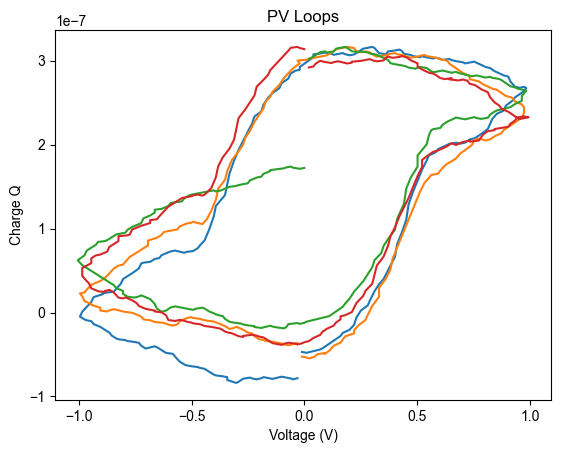

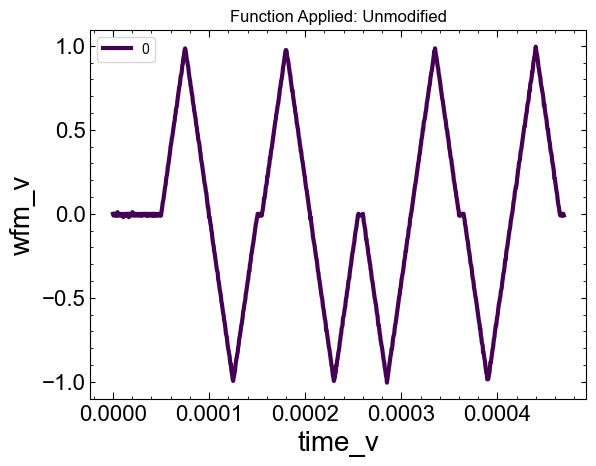

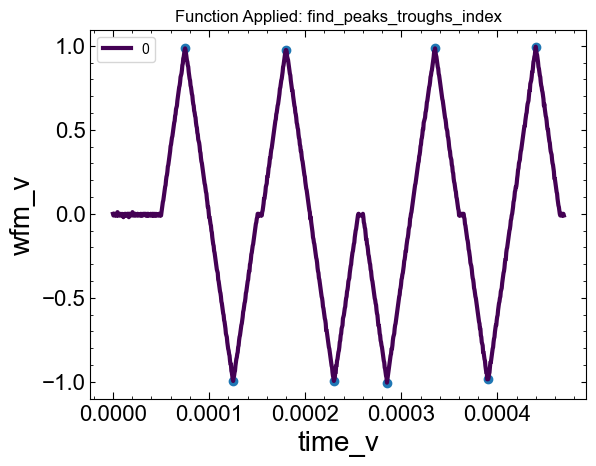

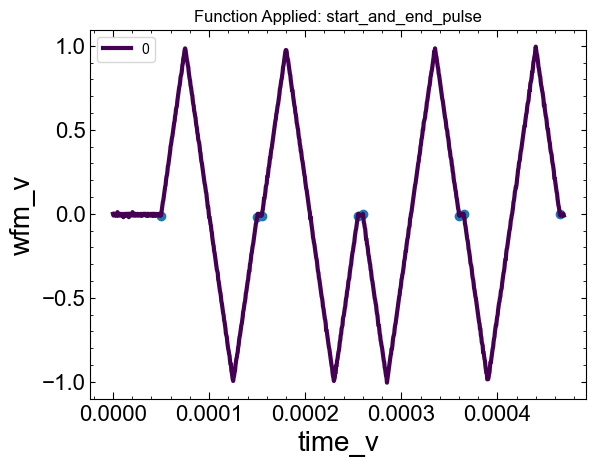

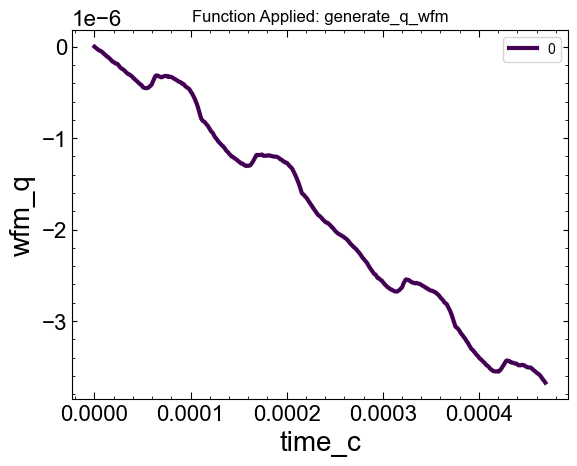

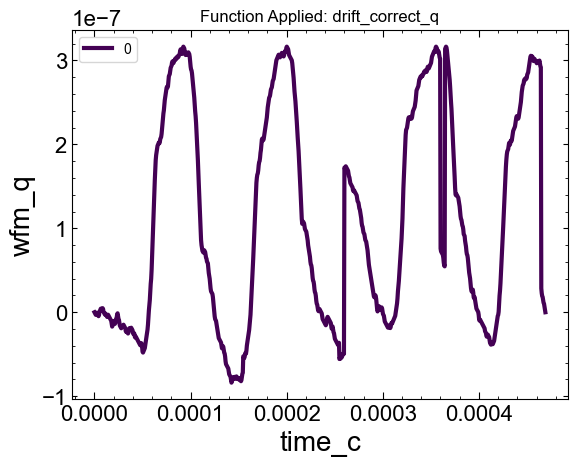

In [6]:
modified_data, interm_steps = use_analysis_file('analysisfile', data2, verbose=True, dont_pass_defn=True)

In [12]:
modified_data.data_keys

['time_v', 'wfm_v', 'time_c', 'wfm_c', 'wfm_q']

In [13]:
modified_data.wfm_q

array([ 2.00061551e-22, -1.25990098e-09, -4.89166102e-09, -6.15156201e-09,
       -2.66774489e-09, -3.92764587e-09, -5.18754686e-09, -4.07558879e-09,
       -5.33548978e-09, -4.22353171e-09, -3.11157364e-09, -6.74333368e-09,
       -1.27469528e-08, -1.63787128e-08, -1.76386138e-08, -1.65266557e-08,
       -1.54146977e-08, -1.66745986e-08, -1.79344996e-08, -1.91944006e-08,
       -2.04543016e-08, -2.17142026e-08, -2.29741036e-08, -2.18621455e-08,
       -2.07501874e-08, -2.20100884e-08, -2.32699894e-08, -2.21580313e-08,
       -2.10460733e-08, -2.23059743e-08, -2.35658752e-08, -2.48257762e-08,
       -2.60856772e-08, -2.97174372e-08, -3.09773382e-08, -2.98653802e-08,
       -3.11252812e-08, -3.23851821e-08, -3.12732241e-08, -2.77894070e-08,
       -2.66774489e-08, -2.79373499e-08, -2.68253918e-08, -2.57134337e-08,
       -2.46014757e-08, -2.11176586e-08, -1.76338414e-08, -1.41500243e-08,
       -1.06662072e-08, -9.55424914e-09, -8.44229107e-09, -4.95847395e-09,
       -1.47465683e-09, -

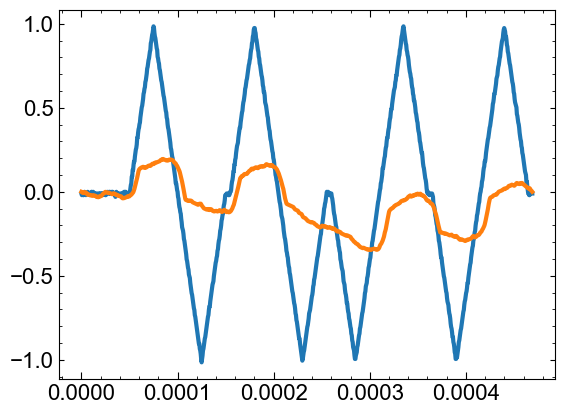

In [22]:
fig, ax = plt.subplots()
ax.plot(modified_data.time_v, modified_data.wfm_v)
ax.plot(modified_data.time_c, 1e6*modified_data.wfm_q)
#showcase delay difference caused by not being synced up (due to the fact that the wavegen does not output chnnl 1 and 2 simulatensouly) maybe there is a way to sync it
#could maybe incorporate a final_delay as opposed to initial delay (or just disregard final pulse)
#ANOTHER POSSIBLE FIX IS TRY TO MOVE THE WF MORE OVER SO WE HAVE MORE SAFETY NET ON BOTH SIDES

In [7]:
complete = interm_steps[list(interm_steps.keys())[-1]]

In [8]:
complete.data_keys

['time_v', 'wfm_v', 'time_c', 'wfm_c', 'peaks', 'start_and_end_pulse', 'wfm_q']

In [ ]:
#want to plot y vs x (polarization[q] vs wfm_v)
complete.wfm_q
complete.start_and_end_pulse

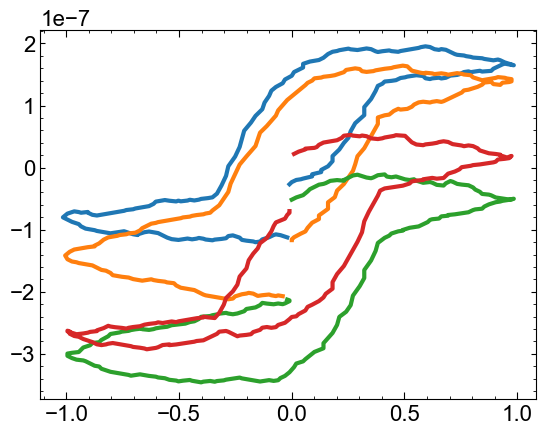

In [9]:
i = 0
while i < len(complete.start_and_end_pulse):
    start = complete.start_and_end_pulse[i]
    end = complete.start_and_end_pulse[i+1]
    plt.plot(complete.wfm_v[start:end], complete.wfm_q[start:end])
    i += 2


Next part we will try to normalize all 4 loops on top of each other by setting the value at volts equal for all 4 (based on the first loop) and shift the rest up from there

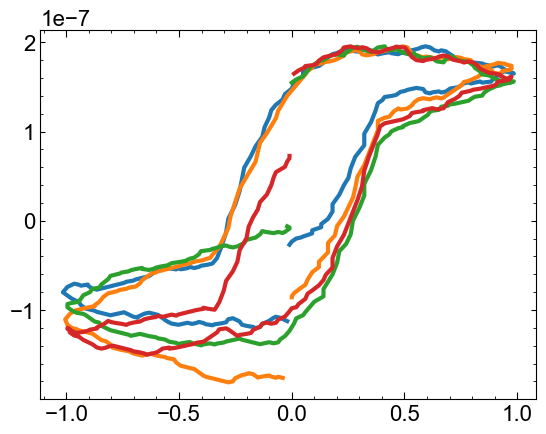

In [23]:
i = 0
start = complete.start_and_end_pulse[0]
end = complete.start_and_end_pulse[0+1]
max = np.max(complete.wfm_q[start:end])
while i < len(complete.start_and_end_pulse):
    start = complete.start_and_end_pulse[i]
    end = complete.start_and_end_pulse[i+1]
    other_max = np.max(complete.wfm_q[start:end])
    y_offset = max - other_max
    complete.wfm_q[start:end] += y_offset 
    plt.plot(complete.wfm_v[start:end], complete.wfm_q[start:end])
    i += 2
